# Assignment for Programming for Data Analysis

Synthesize a data set of a real-world phenomenom and evaluate

As my dataset for this I have chosen to look at the home and away records of each Premiership football match from the 2000-2001 season until 2017-2018 season. I will be examining the relationship between playing at home (versus away) and how it relates to goals scored and cards given.

I obtained this dataset on [Kwaggle](https://www.kaggle.com/datasets/saife245/english-premier-league). I have downloaded it as csv file to my project folder. 

This dataset contains stats from every Premier League game since the beginning of the 00-01 season. For the purposes of this project I will only be looking at 'Home goals scored', 'Away goals scored', 'Home Team Bookings Points' and 'Away Team Bookings Points'.

Booking points are calculated as follows; Each yellow card that is received is worth 10 points and each Red card is worth 25.

Once I understand the relationship between these factors, I will synthesize this data myself.

In [1]:
# First of all I am going to import the libraries that I will be using for this task. 

import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# I have saved the dataset in the same folder as my notebook. I am going to import it to the notebook 

footballdf = pd.read_csv('final_dataset.csv')

In [3]:
#Going to review the dataset to see it is what is expected
footballdf.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/2000,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/2000,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/2000,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/2000,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/2000,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


This dataset contains 45 different variables. For the purpose of this project I will only be looking at 4 'Home goals scored', 'Away goals scored', 'Home Team Bookings Points' and 'Away Team Bookings Points'. In the dataset these variables have the below names.

- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- HBP = Home Team Bookings Points
- ABP = Away Team Bookings Point

I will create a new dataset with just these variables.

In [4]:
prem_df = footballdf[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HBP', 'ABP']]
prem_df.info()
prem_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6840 non-null   object
 1   HomeTeam  6840 non-null   object
 2   AwayTeam  6840 non-null   object
 3   FTHG      6840 non-null   int64 
 4   FTAG      6840 non-null   int64 
 5   HBP       6840 non-null   int64 
 6   ABP       6840 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 374.2+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HBP,ABP
0,19/08/2000,Charlton,Man City,4,0,10,20
1,19/08/2000,Chelsea,West Ham,4,2,10,20
2,19/08/2000,Coventry,Middlesbrough,1,3,75,30
3,19/08/2000,Derby,Southampton,2,2,10,10
4,19/08/2000,Leeds,Everton,2,0,10,30


This dataframe shows the information we want. There are 6840 rows each representing one match that occurred and we can see columns showing what teams played, the goals scored for the home team (FTHG), the goals scored for the away team (FTAG) the booking points for the home team (HBP) and the booking points for the away team (ABP).

In [ ]:
fig, ax = plt.subplots()

total_home_goals = prem_df['FTHG'].sum()
total_away_goals = prem_df['FTAG'].sum()

ax.bar('Home Goals', total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', total_away_goals, label = 'Away Goals')

In [ ]:
fig, ax = plt.subplots()

total_home_bp = prem_df['HBP'].sum()
total_away_bp = prem_df['ABP'].sum()

ax.bar('Home Booking Points', total_home_bp, label = 'Home Booking Points')
ax.bar('Away Booking Points', total_away_bp, label = 'Away Booking Points')

From looking at the above we can see the advantageous relationship of teams playing at home. 


In [ ]:
#Calculate the average goal per game at home versus away and the average booking points at home versus away

average_home_goal = total_home_goals/6840
average_away_goal = total_away_goals/6840
average_home_bp = total_home_bp/6840
average_away_bp = total_away_bp/6840

print(average_home_goal)
print(average_away_goal)
print(average_home_bp)
print(average_away_bp)


In [37]:
home_goals = prem_df['FTHG']
away_goals = prem_df['FTAG']

home_bp = prem_df['HBP']
away_bp = prem_df['ABP']



count    6840.000000
mean       19.993421
std        15.541240
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       120.000000
Name: ABP, dtype: float64

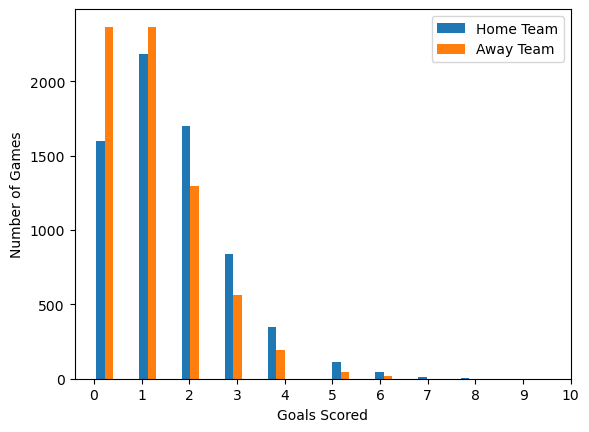

In [35]:
#Create a histogram showing the distribution of goals scored both home and away

plt.hist([home_goals, away_goals], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(0, 11))
plt.ylabel("Number of Games")
plt.xlabel("Goals Scored")
plt.legend()

From inspecting the above histogram the shape seems to fit a positive skewed distribution

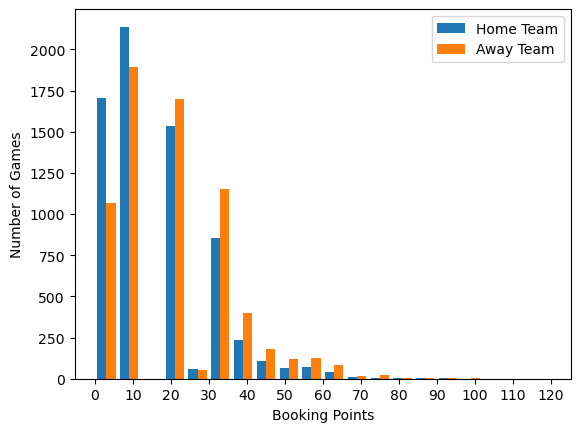

In [24]:
#Create a histogram showing the distribution of booking points both home and away

plt.hist([home_bp, away_bp], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(min(home_bp), max(away_bp)+1, 10))
plt.ylabel("Number of Games")
plt.xlabel("Booking Points")
plt.legend()

From inspecting the above histogram the shape seems to fit a positive skewed distribution

What do we know about the distribution of the variables so far.

#